In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_vs_paper_vs_sciccors.zip

--2020-11-02 09:44:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_vs_paper_vs_sciccors.zip’

/tmp/rock_vs_paper_ 100%[===================>] 307.92M  8.85MB/s    in 43s     

2020-11-02 09:45:00 (7.18 MB/s) - ‘/tmp/rock_vs_paper_vs_sciccors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile, os
local_zip = '/tmp/rock_vs_paper_vs_scicyahoocors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    rotation_range = 20,
    fill_mode = 'wrap',
    horizontal_flip = True,
    validation_split = 0.2
)

In [ ]:
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    training_generator,
    steps_per_epoch = 16,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 4,
    verbose = 2
)

Epoch 1/15
16/16 - 10s - loss: 1.1994 - accuracy: 0.4277 - val_loss: 0.9997 - val_accuracy: 0.6016
Epoch 2/15
16/16 - 10s - loss: 0.8442 - accuracy: 0.6582 - val_loss: 0.6393 - val_accuracy: 0.7656
Epoch 3/15
16/16 - 10s - loss: 0.4808 - accuracy: 0.8281 - val_loss: 0.4247 - val_accuracy: 0.8594
Epoch 4/15
16/16 - 10s - loss: 0.2996 - accuracy: 0.8984 - val_loss: 0.1439 - val_accuracy: 0.9375
Epoch 5/15
16/16 - 10s - loss: 0.3045 - accuracy: 0.8906 - val_loss: 0.2094 - val_accuracy: 0.9375
Epoch 6/15
16/16 - 10s - loss: 0.2064 - accuracy: 0.9258 - val_loss: 0.2184 - val_accuracy: 0.9219
Epoch 7/15
16/16 - 10s - loss: 0.1653 - accuracy: 0.9531 - val_loss: 0.1664 - val_accuracy: 0.9531
Epoch 8/15
16/16 - 10s - loss: 0.1947 - accuracy: 0.9355 - val_loss: 0.1928 - val_accuracy: 0.9375
Epoch 9/15
16/16 - 10s - loss: 0.1518 - accuracy: 0.9434 - val_loss: 0.2206 - val_accuracy: 0.9219
Epoch 10/15
16/16 - 10s - loss: 0.1195 - accuracy: 0.9570 - val_loss: 0.1336 - val_accuracy: 0.9531
Epoch 11/

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 20201102_091304.png to 20201102_091304.png
20201102_091304.png
KERTAS


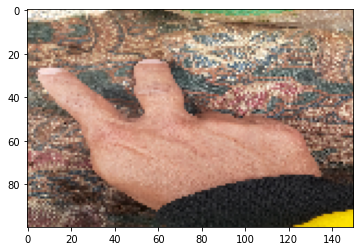

In [ ]:
uploaded = files.upload()

for gambar in uploaded.keys():
  path = gambar
  img = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  clasification = model.predict(images, batch_size = 10)

  print(gambar)
  if clasification[0][0] == 1:
    print("KERTAS")
  elif clasification[0][1] == 1:
    print("BATU")
  elif clasification[0][2] == 1:
    print("GUNTING")
  else:
    print("GAMBAR TIDAK DIKETAHUI")